In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
base_str = "../randomsearch_convae_simulated_clf/"
param_vals = np.load(base_str+"run_96hyperparam_vals_ours.npy")
losses = np.load(base_str+"run_96loss_vals_ours.npy")
performance = np.load(base_str+"run_96performance_ours.npy")
n_highest = 25
x
to_del = []
for i, p in enumerate(performance):
    if len(p[0]) == 2:
        print(i)
        to_del.append(i)

performance = np.array(np.delete(performance, to_del, axis=0))
param_vals = np.array(np.delete(param_vals, to_del, axis=0))
losses = np.array(np.delete(losses, to_del, axis=0))

proton_test_f1 = np.array([p[0][0] for p in performance[:, 1]])
proton_sort_ind = np.flip(np.argsort(proton_test_f1))
sorted_proton_test_f1 = proton_test_f1[proton_sort_ind]

losses = losses[proton_sort_ind][:n_highest]
param_vals = param_vals[proton_sort_ind][:n_highest]
performance = performance[proton_sort_ind][:n_highest]
p = 0
print(sorted_proton_test_f1)
print(param_vals[p], performance[p])

[0.98666667 0.98546042 0.97906602 0.97697368 0.97536946 0.96478873
 0.95016611 0.94370861 0.93537415 0.92307692 0.92109501 0.91233766
 0.90666667 0.90271132 0.89917355 0.89001692 0.88146912 0.8314239
 0.80622837 0.79386712 0.76460177 0.74509804 0.74087591 0.67486034
 0.65217391 0.65068493 0.58596491 0.56521739 0.55095541 0.53377265
 0.52786885 0.52333333 0.52333333 0.5187602  0.50756303 0.50326797
 0.50082919 0.50082372 0.48903879 0.45874587 0.4460177  0.        ]
[list([[2, 16, 64], [17, 15, 3], [2, 2, 2], [0, 0, 0], 3])
 list([0.01, 1e-05, 0.7267722581866471, 0.99, 150])
 {'simulated_mode': False, 'restore_mode': False, 'include_KL': False, 'include_MMD': False, 'include_KM:': False, 'batchnorm': False}
 {} 'mse' 'relu'] [[[1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]

 [[0.98666667 0.98666667]
  [0.98996656 0.9833887 ]
  [0.9833887  0.98996656]]]


/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


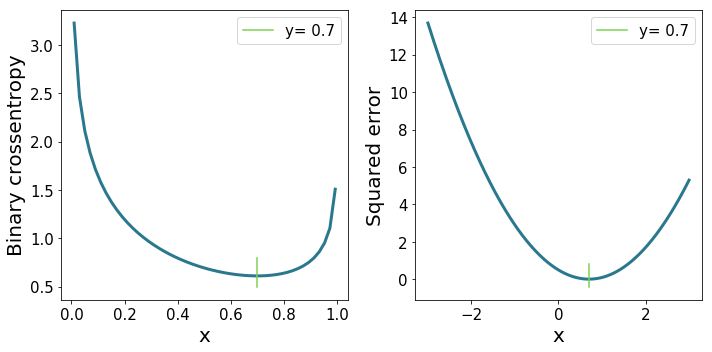

In [3]:
def binary_crossent(x, y=1): return -(y*np.log(x) + (1-y)*np.log(1-x))
def mse(x, y=1): return np.power(x-y, 2)
viridis = matplotlib.cm.get_cmap('viridis')
x = np.linspace(-3, 3, 300)
y = [0.7, ] #np.linspace(1e-3, 1, 5)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
for y_ in y:
    ax[0].plot(x, binary_crossent(x, y_), linewidth=3, color=viridis(0.4))
    ax[0].plot([y_,]*2,[0.5, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[0].set_xlabel("x", size=20)
    ax[0].set_ylabel("Binary crossentropy", size=20)
    ax[0].legend(fontsize=15)
    
    ax[1].plot(x, mse(x, y_), linewidth=3, color=viridis(0.4))
    ax[1].plot([y_,]*2,[-0.4, 0.8], label="y= "+str(y_), color=viridis(0.8))
    ax[1].set_xlabel("x", size=20)
    ax[1].set_ylabel("Squared error", size=20)
    ax[1].legend(fontsize=15)
    
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

In [4]:
print(performance.shape)
print("experiments, train/test, scores, classes")
print(performance[0])

(25, 2, 3, 2)
experiments, train/test, scores, classes
[[[1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]

 [[0.98666667 0.98666667]
  [0.98996656 0.9833887 ]
  [0.9833887  0.98996656]]]


In [5]:
losses.shape

(25, 2, 2000)

0.9866666666666667
0.9866666666666667
0.9854604200323102
0.9854604200323102
0.9790660225442833
0.9790660225442833
0.9769736842105264
0.9769736842105264
0.9753694581280787
0.9753694581280787
0.9501661129568106
0.9501661129568106
0.9437086092715231
0.9437086092715231
0.9230769230769231
0.9230769230769231


/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


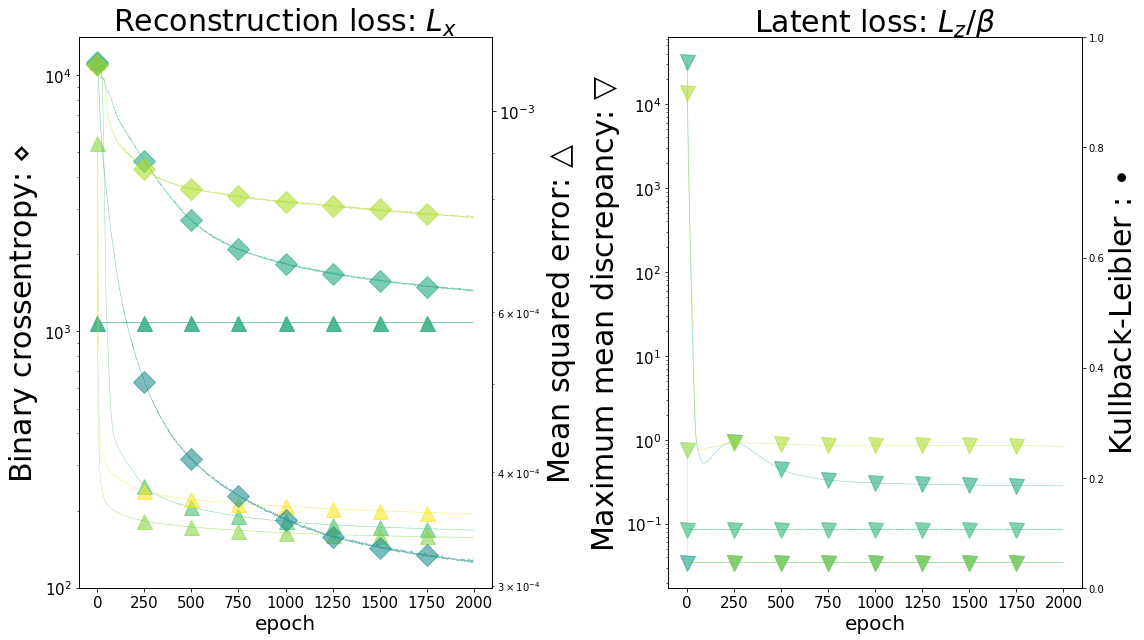

In [55]:
loss_names = [r"$L_x$", r"$L_z/\beta$"]
n_plot = 10
fig, ax = plt.subplots(ncols=losses.shape[1], figsize=(16, 9))
colors = viridis(np.linspace(0.5,0.99, n_plot))
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

#fig.suptitle("Loss curves from simulated parameter search", size=35)

label_size = 30
ax[1].set_ylabel(r"Maximum mean discrepancy: $\bigtriangledown$", size=label_size)
ax3.set_ylabel(r"Kullback-Leibler : $\bullet$", size=label_size)

ax2.set_ylabel(r"Mean squared error: $\bigtriangleup$", size=label_size)
ax[0].set_ylabel(r"Binary crossentropy: $\diamond$", size=label_size)

ax[0].set_title(r"Reconstruction loss: "+loss_names[0], size=30)
ax[1].set_title("Latent loss: "+loss_names[1], size=30)

for j in range(n_plot):
    if j == 5:
        continue
    if j == 8:
        continue
    for i, a in enumerate(ax):
        if i == 1:
            beta = param_vals[j][1][0]
            mode = param_vals[j][2]
            which = None
            for l, v in mode.items():
                if v:
                    if l != "batchnorm":
                        which = l
            if which == "include_KL":
                fmt = "o-"
                a = ax3
            elif which == "include_MMD":
                fmt = "v-"
                a = ax[1]
            else:
                fmt = "-"
        else:
            beta = 1
            if np.any(losses[j, i, :][50:]>1e1):
                fmt = "^-"
            else:
                fmt = "D-"
                a = ax2
        loss = losses[j, i, 2:]/beta
        a.semilogy(
            np.arange(loss.shape[0]),
            loss,
            fmt,
            markevery=250,
            color=colors[j],
            markersize=15,
            linewidth=0.5,
            alpha=0.6
        )
        print(sorted_proton_test_f1[j])
        a.tick_params(axis='both', which='major', labelsize=15)
        a.set_xlabel("epoch", size=20)

#ax[0].set_yscale("linear")
ax[0].set_yticks([1e4, 1e3, 1e2])
plt.tight_layout()
plt.savefig("../plots/simulated_clf/randomsearch_loss.png")
plt.savefig("../plots/simulated_clf/randomsearch_loss.pdf")

In [7]:
import pandas as pd 
columns = [
    "proton f1 score",
    "N parameters",
    "largest kernel",
    "N layers",
    "latent dimension",
    "latent loss",
    "reconstruction loss",
    "activation function",
    "batchnorm",
    r"$\beta$",
    r"$\beta_1$",
    r"$\eta$",
]
categorical_cols = [
    "latent loss",
    "reconstruction loss",
    "activation function",
]
param_performance = np.zeros((performance.shape[0], len(columns))).astype(object)

for i in range(performance.shape[0]):
    config = param_vals[i]
    p_f1 = sorted_proton_test_f1[i]
    n_params = 0
    for f, k in zip(config[0][0], config[0][1]):
        n_params += k**2*f
    n_layers = config[0][4]
    end_size = 80/(2**n_layers)
    beta1 = config[1][2]
    beta = config[1][1]
    latent_dim = config[1][4]
    eta=config[1][1]
    mode_config = config[2]
    batchnorm = mode_config["batchnorm"]
    
    latent_loss = "mmd" if mode_config["include_MMD"] else "kld"
    if latent_loss == "kld":
        latent_loss = latent_loss if mode_config["include_KL"] else "none"
    
    reconst_loss = config[4]
    if reconst_loss is None:
        reconst_loss = "bce"
        
    activation = config[5] 
    param_performance[i] = [
        p_f1,
        n_params,
        config[0][1][0],
        n_layers,
        latent_dim,
        latent_loss,
        reconst_loss,
        activation,
        batchnorm,
        beta,
        beta1,
        eta
    ]

perf_df = pd.DataFrame(param_performance, columns=columns)

In [8]:
test_df = perf_df.copy()
for c in categorical_cols:
    dummy = pd.get_dummies(test_df[c])
    test_df = pd.concat([test_df, dummy], axis=1)
    test_df = test_df.drop(c, axis=1)

In [9]:
test_df

,proton f1 score,N parameters,largest kernel,N layers,latent dimension,batchnorm,$\beta$,$\beta_1$,$\eta$,kld,mmd,none,bce,mse,lrelu,relu
0,0.986667,4754,17,3,150,False,1e-05,0.726772,1e-05,0,0,1,0,1,0,1
1,0.98546,3798,13,6,50,False,0.001,0.817218,0.001,0,1,0,1,0,1,0
2,0.979066,3636,15,5,150,False,1e-05,0.687743,1e-05,0,1,0,0,1,1,0
3,0.976974,2408,11,3,3,True,0.1,0.557198,0.1,0,1,0,1,0,0,1
4,0.975369,760,7,5,150,True,1e-05,0.24941,1e-05,0,0,1,1,0,1,0
5,0.964789,1712,7,3,200,False,0.1,0.429403,0.1,0,1,0,0,1,0,1
6,0.950166,1740,11,5,50,False,0.0001,0.532902,0.0001,0,1,0,1,0,0,1
7,0.943709,464,7,5,100,False,0.0001,0.692096,0.0001,0,1,0,0,1,0,1
8,0.935374,5194,15,4,50,True,0.1,0.930475,0.1,0,0,1,0,1,0,1
9,0.923077,9266,17,5,10,True,1e-05,0.316576,1e-05,0,0,1,1,0,0,1


In [71]:
from scipy.stats import spearmanr
test_df = test_df.astype(float)
corr_array = np.zeros((len(test_df.columns), 2))
for i, c in enumerate(test_df.columns):
    w, p = spearmanr(test_df[c], test_df["proton f1 score"])
    corr_array[i] = [w, p]

corr_m = pd.DataFrame(corr_array, columns=[r"$\rho_s$", "p"], index=test_df.columns)

In [72]:
corr_m

,$\rho_s$,p
proton f1 score,1.000000,0.000000
N parameters,0.357376,0.079456
largest kernel,0.383564,0.058389
N layers,-0.259562,0.210214
latent dimension,0.166625,0.425997
batchnorm,0.261608,0.206513
$\beta$,-0.137667,0.511675
$\beta_1$,-0.064615,0.758952
$\eta$,-0.137667,0.511675
kld,-0.153627,0.463448


In [77]:
print(corr_m.to_latex(float_format=lambda x: "{:.2g}".format(x),  escape=False),)

\begin{tabular}{lrr}
\toprule
{} &  $\rho_s$ &     p \\
\midrule
proton f1 score  &         1 &     0 \\
N parameters     &      0.36 & 0.079 \\
largest kernel   &      0.38 & 0.058 \\
N layers         &     -0.26 &  0.21 \\
latent dimension &      0.17 &  0.43 \\
batchnorm        &      0.26 &  0.21 \\
$\beta$          &     -0.14 &  0.51 \\
$\beta_1$        &    -0.065 &  0.76 \\
$\eta$           &     -0.14 &  0.51 \\
kld              &     -0.15 &  0.46 \\
mmd              &      0.11 &  0.59 \\
none             &    -0.012 &  0.96 \\
bce              &       0.1 &  0.63 \\
mse              &      -0.1 &  0.63 \\
lrelu            &     -0.26 &  0.21 \\
relu             &      0.26 &  0.21 \\
\bottomrule
\end{tabular}



In [54]:
param_vals[3]

array([list([[16, 16, 8], [11, 5, 3], [2, 2, 2], [0, 0, 0], 3]),
       list([10.0, 0.1, 0.5571980722329937, 0.99, 3]),
       {'simulated_mode': False, 'restore_mode': False, 'include_KL': False, 'include_MMD': True, 'include_KM:': False, 'batchnorm': True},
       {}, None, 'relu'], dtype=object)

In [52]:
perf_df

,proton f1 score,N parameters,largest kernel,N layers,latent dimension,latent loss,reconstruction loss,activation function,batchnorm,$\beta$,$\beta_1$,$\eta$
0,0.986667,4754,17,3,150,none,mse,relu,False,1e-05,0.726772,1e-05
1,0.98546,3798,13,6,50,mmd,bce,lrelu,False,0.001,0.817218,0.001
2,0.979066,3636,15,5,150,mmd,mse,lrelu,False,1e-05,0.687743,1e-05
3,0.976974,2408,11,3,3,mmd,bce,relu,True,0.1,0.557198,0.1
4,0.975369,760,7,5,150,none,bce,lrelu,True,1e-05,0.24941,1e-05
5,0.964789,1712,7,3,200,mmd,mse,relu,False,0.1,0.429403,0.1
6,0.950166,1740,11,5,50,mmd,bce,relu,False,0.0001,0.532902,0.0001
7,0.943709,464,7,5,100,mmd,mse,relu,False,0.0001,0.692096,0.0001
8,0.935374,5194,15,4,50,none,mse,relu,True,0.1,0.930475,0.1
9,0.923077,9266,17,5,10,none,bce,relu,True,1e-05,0.316576,1e-05


In [12]:
print(perf_df.to_latex(
    #"../tables/randomsearch_convae_simulated_clf/hyperparams.tex",
    index=False,
    longtable=False,
    float_format=lambda x: "{:.2g}".format(x)
))

\begin{tabular}{llllllllllll}
\toprule
proton f1 score & N parameters & largest kernel & N layers & latent dimension & latent loss & reconstruction loss & activation function & batchnorm & \$\textbackslash beta\$ & \$\textbackslash beta\_1\$ & \$\textbackslash eta\$ \\
\midrule
           0.99 &         4754 &             17 &        3 &              150 &        none &                 mse &                relu &     False &   1e-05 &      0.73 &  1e-05 \\
           0.99 &         3798 &             13 &        6 &               50 &         mmd &                 bce &               lrelu &     False &   0.001 &      0.82 &  0.001 \\
           0.98 &         3636 &             15 &        5 &              150 &         mmd &                 mse &               lrelu &     False &   1e-05 &      0.69 &  1e-05 \\
           0.98 &         2408 &             11 &        3 &                3 &         mmd &                 bce &                relu &      True &     0.1 &      0.56 &    

In [51]:
with open("../metrics_clf/simulated/f1_scores2000.tex") as fo:
    s = "".join(fo.readlines())
print(s)

 & \multicolumn{3}{c}{Proton} & \multicolumn{3}{c}{Carbon} \\  
 \hline 
 & f1 & recall & precision & f1 & recall & precision\\  
 Train & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ & $ \underset{ \num{+- 0.00e+00 } } {\num{ 1.00 } }  $ \\ 
  Test & $ \underset{ \num{+- 3.61e-03 } } {\num{ 0.99 } }  $ & $ \underset{ \num{+- 3.72e-03 } } {\num{ 0.99 } }  $ & $ \underset{ \num{+- 9.12e-03 } } {\num{ 0.99 } }  $ & $ \underset{ \num{+- 7.37e-03 } } {\num{ 0.99 } }  $ & $ \underset{ \num{+- 7.13e-03 } } {\num{ 0.99 } }  $ & $ \underset{ \num{+- 9.25e-03 } } {\num{ 0.99 } }  $
 
